In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
df_blue_waters_posix_user_work = pd.read_csv(r"/home/thes1067/data/blue_waters_dataset/blue_waters_posix_user_work.csv")

In [3]:
df_blue_waters_posix_thes_home = pd.read_csv(r"/home/thes1067/data/blue_waters_dataset/blue_waters_posix_thes_home.csv")

In [4]:
df_blue_waters_posix_thes_work = pd.read_csv(r"/home/thes1067/data/blue_waters_dataset/blue_waters_posix_thes_work.csv")

In [5]:
df_blue_waters_posix_combined = pd.concat([df_blue_waters_posix_user_work, df_blue_waters_posix_thes_home, df_blue_waters_posix_thes_work], copy=False)

In [6]:
len(df_blue_waters_posix_combined)

688295

In [7]:
df_blue_waters_posix_combined.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,POSIX_F_VARIANCE_RANK_TIME,POSIX_F_VARIANCE_RANK_BYTES,uid,start_time,end_time,nprocs,jobid,lib_ver,hints,bandwidth
0,409.0,-151.0,-151.0,53765.0,32819.0,14356.0,668.0,0.0,0.0,0.0,...,0.0,0.0,343011.0,2017-11-17 17:28:40,2017-11-17 19:32:23,128.0,7838595.0,3.1.3,romio_no_indep_rw=true;cb_nodes=4,530.007513
1,93685.0,-7219.0,-7219.0,1324243.0,805486.0,1741670.0,241638.0,0.0,1.0,0.0,...,0.0,0.0,264226.0,2018-03-14 17:05:16,2018-03-14 18:10:04,128.0,8310991.0,3.1.3,romio_no_indep_rw=true;cb_nodes=4,415.151070
2,15282.0,-579.0,-579.0,385263.0,49319.0,307018.0,35508.0,0.0,1.0,0.0,...,0.0,0.0,383569.0,2017-11-26 20:13:02,2017-11-26 20:19:28,48.0,7868727.0,3.1.3,romio_no_indep_rw=true;cb_nodes=4,143.803163
3,8709.0,-288.0,-288.0,1504826.0,6324671.0,1992637.0,28430.0,0.0,0.0,0.0,...,0.0,0.0,341996.0,2018-11-02 03:02:58,2018-11-02 03:11:52,256.0,9167246.0,3.1.3,romio_no_indep_rw=true;cb_nodes=4,382.896416
4,49152.0,-24576.0,-24576.0,0.0,0.0,0.0,24576.0,0.0,0.0,0.0,...,0.0,0.0,49294.0,2019-09-09 01:01:18,2019-09-09 01:02:03,24.0,10296931.0,3.1.3,romio_no_indep_rw=true;cb_nodes=4,0.000000


In [8]:
df_blue_waters_posix_combined.to_csv(r"/home/thes1067/data/blue_waters_dataset/blue_waters_posix.csv", index=False)

### Drop the irrelevant columns

In [9]:
df_blue_waters_posix_filtered = df_blue_waters_posix_combined.drop(['uid', 'jobid', 'hints', 'start_time', 'end_time', 'lib_ver'],
                                                               axis=1)

In [10]:
df_blue_waters_posix_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688295 entries, 0 to 557973
Columns: 102 entries, POSIX_OPENS to bandwidth
dtypes: float64(102)
memory usage: 540.9 MB


### Remove columns that have only 0s in them

In [11]:
df_blue_waters_posix_filtered.loc[:, (df_blue_waters_posix_filtered == 0).all()]

,POSIX_FDSYNCS,POSIX_RENAMED_FROM,POSIX_F_VARIANCE_RANK_TIME,POSIX_F_VARIANCE_RANK_BYTES
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
557969,0.0,0.0,0.0,0.0
557970,0.0,0.0,0.0,0.0
557971,0.0,0.0,0.0,0.0
557972,0.0,0.0,0.0,0.0


In [12]:
df_blue_waters_posix_filtered = df_blue_waters_posix_filtered.loc[:, (df_blue_waters_posix_filtered != 0).any()]

### Look for outliers in the data

In [13]:
df_blue_waters_posix_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,688295.0,2.485209e+04,7.022253e+05,0.000000e+00,194.000000,4965.000000,1.532700e+04,5.531094e+08
POSIX_FILENOS,688295.0,-1.115067e+03,1.182626e+04,-2.839714e+06,-993.000000,-288.000000,-2.000000e+01,-1.000000e+00
POSIX_DUPS,688295.0,-1.115067e+03,1.182626e+04,-2.839714e+06,-993.000000,-288.000000,-2.000000e+01,-1.000000e+00
POSIX_READS,688295.0,2.264679e+06,7.279792e+07,0.000000e+00,12072.000000,216136.000000,1.528241e+06,2.237846e+10
POSIX_WRITES,688295.0,3.937390e+06,4.709131e+07,0.000000e+00,7489.000000,241613.000000,2.890529e+06,1.302770e+10
...,...,...,...,...,...,...,...,...
POSIX_F_MAX_WRITE_TIME,688295.0,2.698876e+00,7.673713e+01,0.000000e+00,0.097087,0.419275,1.021462e+00,4.816238e+04
POSIX_F_FASTEST_RANK_TIME,688295.0,-1.795532e+01,2.671742e+03,-1.688371e+06,0.000000,0.000000,0.000000e+00,9.564285e+02
POSIX_F_SLOWEST_RANK_TIME,688295.0,3.539387e+01,4.281236e+02,-1.198320e+00,0.069269,0.630576,2.584114e+00,7.015392e+04
nprocs,688295.0,1.653303e+02,2.077034e+03,1.000000e+00,16.000000,48.000000,6.400000e+01,5.242880e+05


We can see that the minimum values are **negative** for:
- POSIX_F_FASTEST_RANK_TIME
- POSIX_F_SLOWEST_RANK_TIME
- POSIX_F_META_TIME
- POSIX_TOTAL_TIME (probably because of the above)

These do not really make sense and are caused by the improper job closure or hardware faults, so should be fitlered out.

In [14]:
df_posix_negative_outliers = df_blue_waters_posix_filtered.loc[(df_blue_waters_posix_filtered.POSIX_F_FASTEST_RANK_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_F_SLOWEST_RANK_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_F_META_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_TOTAL_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.bandwidth < 0)]
df_posix_negative_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_READ_TIME,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth
10,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.728189,-1.728189,0.0,0.0,0.0,0.0,32.0,-0.0
38,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.548133,-1.548133,0.0,0.0,0.0,0.0,32.0,-0.0
85,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.508263,-1.508263,0.0,0.0,0.0,0.0,32.0,-0.0
112,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.441263,-1.441263,0.0,0.0,0.0,0.0,32.0,-0.0
130,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.361301,-1.361301,0.0,0.0,0.0,0.0,32.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557851,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.366220,-1.366220,0.0,0.0,0.0,0.0,32.0,-0.0
557876,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.711079,-1.711079,0.0,0.0,0.0,0.0,32.0,-0.0
557902,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.551408,-1.551408,0.0,0.0,0.0,0.0,32.0,-0.0
557920,1.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,0.0,-1.0,...,0.0,0.0,-1.631680,-1.631680,0.0,0.0,0.0,0.0,32.0,-0.0


In [15]:
df_blue_waters_posix_filtered_no_outliers = df_blue_waters_posix_filtered.loc[(df_blue_waters_posix_filtered.POSIX_F_FASTEST_RANK_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_F_SLOWEST_RANK_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_F_META_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_TOTAL_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.bandwidth >= 0)]
df_blue_waters_posix_filtered_no_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_READ_TIME,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth
0,409.0,-151.0,-151.0,53765.0,32819.0,14356.0,668.0,0.0,0.0,-151.0,...,0.000191,23.120428,0.190437,23.311056,0.057234,0.313370,0.0,0.084808,128.0,530.007513
1,93685.0,-7219.0,-7219.0,1324243.0,805486.0,1741670.0,241638.0,0.0,1.0,-7219.0,...,44.626631,0.000000,2.256007,46.882638,0.927268,2.057324,0.0,0.629165,128.0,415.151070
2,15282.0,-579.0,-579.0,385263.0,49319.0,307018.0,35508.0,0.0,1.0,-579.0,...,25.999545,0.000000,1.889761,27.889305,0.188065,0.172940,0.0,0.730199,48.0,143.803163
3,8709.0,-288.0,-288.0,1504826.0,6324671.0,1992637.0,28430.0,0.0,0.0,-288.0,...,13575.713380,23.611587,5.023954,13604.348921,0.435420,0.221402,0.0,53.637936,256.0,382.896416
4,49152.0,-24576.0,-24576.0,0.0,0.0,0.0,24576.0,0.0,0.0,-24576.0,...,0.000000,0.000000,0.945337,0.945337,0.000000,0.000000,0.0,0.000000,24.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557968,1963.0,-800.0,-800.0,3075.0,18136.0,3588.0,1128.0,0.0,0.0,-800.0,...,0.088863,30.736977,0.013606,30.839446,0.033455,0.003340,0.0,0.014430,1024.0,473.614553
557969,17023.0,-1219.0,-1219.0,2644952.0,2166310.0,3591606.0,278597.0,0.0,1.0,-1219.0,...,85.291439,67.845316,9.158299,162.295054,0.919756,3.232678,0.0,0.569927,48.0,77.488622
557970,7937.0,-1540.0,-1540.0,441731.0,367880.0,496803.0,15874.0,0.0,0.0,-1540.0,...,369.813292,0.000000,1.415581,371.228873,0.374954,0.821097,0.0,0.813907,512.0,95.127266
557972,114.0,-13.0,-13.0,45728.0,10983.0,76.0,226.0,0.0,0.0,-13.0,...,5.672441,0.000000,0.247460,5.919902,0.024004,0.084406,0.0,0.377315,16.0,74.556061


### Look at the boxplot of bandwidth

<AxesSubplot: title={'center': 'Boxplot for bandwidth'}, xlabel='bandwidth'>

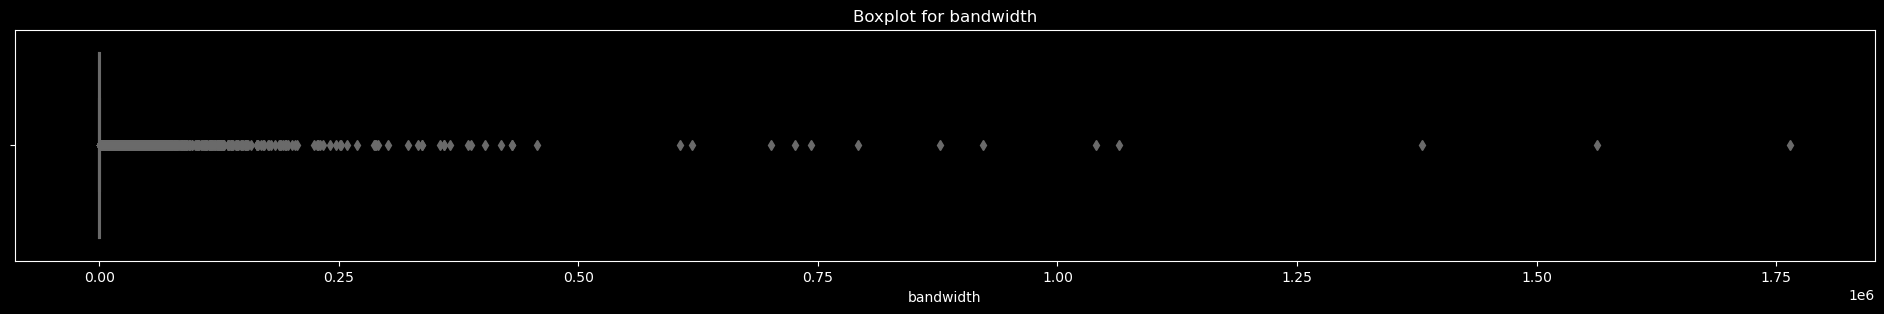

In [16]:
fig = plt.figure(1, figsize=(24, 3))
plt.title("Boxplot for bandwidth")
sns.boxplot(x=df_blue_waters_posix_filtered_no_outliers.bandwidth)

In [17]:
bandwidth_q1 = df_blue_waters_posix_filtered_no_outliers.bandwidth.quantile(0.25)
bandwidth_q3 = df_blue_waters_posix_filtered_no_outliers.bandwidth.quantile(0.75)
bandwidth_iqr = bandwidth_q3 - bandwidth_q1
bandwidth_iqr

330.2077594267767

In [18]:
filter = (df_blue_waters_posix_filtered_no_outliers.bandwidth >= bandwidth_q1 - 1.5 * bandwidth_iqr) & (df_blue_waters_posix_filtered_no_outliers.bandwidth <= bandwidth_q3 + 1.5 * bandwidth_iqr)

bandwidth_outliers = df_blue_waters_posix_filtered_no_outliers.loc[(filter)==False]
bandwidth_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_READ_TIME,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth
5,44893.0,-885.0,-885.0,1539777.0,532387.0,911860.0,213336.0,0.0,1.0,-885.0,...,8.624237,13.439585,1.697953,23.761776,0.275909,0.621971,0.0,0.323792,40.0,1503.897201
9,4147.0,-515.0,-515.0,194326.0,69691.0,177026.0,8294.0,0.0,0.0,-515.0,...,79.003991,0.000000,0.413331,79.417322,0.724220,0.162866,0.0,0.345536,256.0,1843.759693
13,59424.0,-1134.0,-1134.0,2287607.0,523603.0,1196507.0,271819.0,0.0,1.0,-1134.0,...,34.235062,16.232375,1.248432,51.715869,0.230324,0.497086,0.0,0.316973,32.0,1172.076735
19,18845.0,-774.0,-774.0,1511906.0,742503.0,1508351.0,81606.0,0.0,1.0,-774.0,...,21.509925,0.000000,2.137943,23.647868,0.230091,0.675757,0.0,0.630883,48.0,863.162948
40,16604.0,-1371.0,-1371.0,1928305.0,805250.0,1368318.0,69184.0,0.0,1.0,-1371.0,...,9.022592,0.000000,0.828200,9.850791,0.205743,0.333407,0.0,0.351495,32.0,7010.093406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557949,195310.0,-1585.0,-1585.0,7277386.0,1073987.0,3269576.0,885667.0,0.0,1.0,-1585.0,...,20.235163,30.501465,4.646519,55.383146,0.208083,0.515872,0.0,1.073477,48.0,4484.824541
557959,31654.0,-1060.0,-1060.0,1530970.0,384504.0,823946.0,145173.0,0.0,1.0,-1060.0,...,14.014111,5.139422,0.737320,19.890853,0.146485,0.581301,0.0,0.486682,32.0,2492.273669
557961,29505.0,-1724.0,-1724.0,169271226.0,2860156.0,154890831.0,82658.0,0.0,0.0,-1724.0,...,212.353854,172.054740,6.519194,390.927788,4.501124,8.742468,0.0,0.787354,64.0,7884.958416
557964,191407.0,-3148.0,-3148.0,5711715.0,893298.0,3042208.0,821264.0,0.0,1.0,-3148.0,...,62.809881,33.046097,0.911699,96.767677,0.314583,0.603006,0.0,0.565160,96.0,1465.494741


<AxesSubplot: xlabel='bandwidth'>

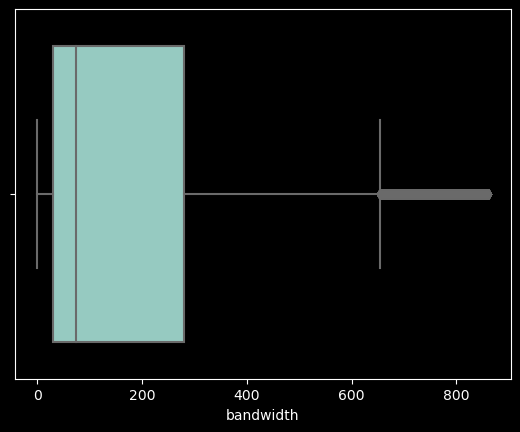

In [20]:
sns.boxplot(x=df_blue_waters_posix_filtered_no_outliers.bandwidth)

In [21]:
df_blue_waters_posix_filtered_no_outliers.to_csv(r"/home/thes1067/data/blue_waters_dataset/blue_waters_posix_all_no_outliers.csv", index=False)